## Modelling Notebook

This notebook is to be used for testing out the various models that you want to use. No preprocessing will be done in this notebook. Steps:

1. Read in `input/train.csv`,`input/test.csv`,`input/validation.csv` that you created in the `Data Cleaning.ipynb`
2. Train your model(s) on `input/train.csv` and EVALUATE (no training) with appropriate metrics (accuracy/MSE etc) on `input/validation.csv` 
3. Pick a final model and EVALUATE(no training) on `input/test.csv` and print metrics
3. Pick a final model and save it as `models/model.pkl`

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
train_df=pd.read_csv("../input/train.csv")
test_df=pd.read_csv("../input/test.csv")
validation_df=pd.read_csv("../input/validation.csv")

In [3]:
def return_X_and_y(df):
    return df.drop(columns=["target"]),df["target"]

In [4]:
X_train,y_train=return_X_and_y(train_df)
X_test,y_test=return_X_and_y(test_df)
X_val,y_val=return_X_and_y(validation_df)

In [5]:
X_train.shape

(27541, 17)

In [6]:
model=Sequential()
model.add(layers.Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1800      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 9,451
Trainable params: 9,451
Non-trainable params: 0
_________________________________________________________________


In [8]:
y_train.value_counts()

1    13798
0    13743
Name: target, dtype: int64

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history=model.fit(X_train,y_train,batch_size=100,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
276/276 [==============================] - 3s 5ms/step - loss: 0.5393 - accuracy: 0.7209 - val_loss: 0.4926 - val_accuracy: 0.7614
Epoch 2/50
276/276 [==============================] - 1s 4ms/step - loss: 0.4953 - accuracy: 0.7573 - val_loss: 0.4763 - val_accuracy: 0.7722
Epoch 3/50
276/276 [==============================] - 1s 4ms/step - loss: 0.4822 - accuracy: 0.7673 - val_loss: 0.4681 - val_accuracy: 0.7764
Epoch 4/50
276/276 [==============================] - 1s 4ms/step - loss: 0.4747 - accuracy: 0.7692 - val_loss: 0.4616 - val_accuracy: 0.7796
Epoch 5/50
276/276 [==============================] - 1s 4ms/step - loss: 0.4704 - accuracy: 0.7738 - val_loss: 0.4669 - val_accuracy: 0.7743
Epoch 6/50
276/276 [==============================] - 1s 4ms/step - loss: 0.4641 - accuracy: 0.7781 - val_loss: 0.4574 - val_accuracy: 0.7813
Epoch 7/50
276/276 [==============================] - 1s 4ms/step - loss: 0.4631 - accuracy: 0.7786 - val_loss: 0.4542 - val_accuracy: 0.7847
Epoch 

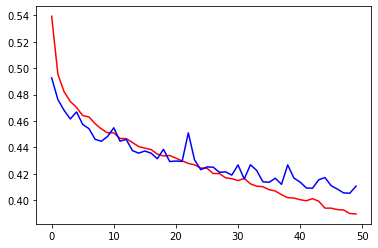

In [11]:
plt.plot(history.history["loss"],color="red")
plt.plot(history.history["val_loss"],color="blue")